# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis.app")

Mono path[0] = '/Users/james/Documents/udacity/tennis-multi-agent/p3_collab-compet/Tennis.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/james/Documents/udacity/tennis-multi-agent/p3_collab-compet/Tennis.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
# There is no need to start at the top of this notebook.  If you want to skip 
# right to training, run this cell for imports/environment definition and 
# continue on.  If the environment has already been defined above, then no 
# need to do it again here.
#
# ALERT: If you run the environment and then close it, you can not re-run 
#        the training loop without restarting the kernel or you may get 
#        a broken pipe to the Unity environment.  This occurs on Mac environments
#        and is untested on other OS's
#
try:
    # see if environment is defined from running the code above.
    # if it is, do not redefine env.
    env
except:
    from unityagents import UnityEnvironment
    import numpy as np
    import time
    import torch
    from collections import deque
    import matplotlib.pyplot as plt

    env = UnityEnvironment(file_name="./Tennis.app")    


Mono path[0] = '/Users/james/Documents/udacity/tennis-multi-agent/p3_collab-compet/Tennis.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/james/Documents/udacity/tennis-multi-agent/p3_collab-compet/Tennis.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
num_agents = len(env_info.agents)
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 2
Number of actions: 2
States look like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
States have length: 24


In [4]:
from ddpg_agent import Agent
agent0 = Agent(
    state_size=state_size, 
    action_size=action_size, 
    random_seed=0, 
    a_fc1_units=400, a_fc2_units=300,
    c_fc1_units=400, c_fc2_units=300,
)
# agent1 = Agent(
#     state_size=state_size, 
#     action_size=action_size, 
#     random_seed=0, 
#     a_fc1_units=400, a_fc2_units=300,
#     c_fc1_units=400, c_fc2_units=300,
# )
# agents = [agent0, agent1]

# we just use the same agent for both agents.
# this way they can share memory buffer for training and since they are collaborating,
# likely should be the same agent anyway.
agents = [agent0, agent0]

In [ ]:
print(agent0.actor_local)
print(agent0.critic_local)

Episode 500	Average Score: 0.0682	 Memory Size: 20242	Elapsed Time: 150.1885 sec
Episode 1000	Average Score: 0.0159	 Memory Size: 37074	Elapsed Time: 277.6089 sec
Episode 1500	Average Score: 0.0828	 Memory Size: 72854	Elapsed Time: 549.4054 sec
Episode 2000	Average Score: 0.1120	 Memory Size: 123066	Elapsed Time: 935.6939 sec
Episode 2500	Average Score: 0.4073	 Memory Size: 228334	Elapsed Time: 1795.4472 sec
Episode 3000	Average Score: 0.1251	 Memory Size: 289536	Elapsed Time: 2325.0231 sec
Episode 3500	Average Score: 1.8176	 Memory Size: 633440	Elapsed Time: 5889.3029 sec
Episode 4000	Average Score: 1.3567	 Memory Size: 1000000	Elapsed Time: 13757.3752 sec
Episode 4500	Average Score: 0.4269	 Memory Size: 1000000	Elapsed Time: 15602.6458 sec
Episode 5000	Average Score: 0.7377	 Memory Size: 1000000	Elapsed Time: 19932.3672 sec


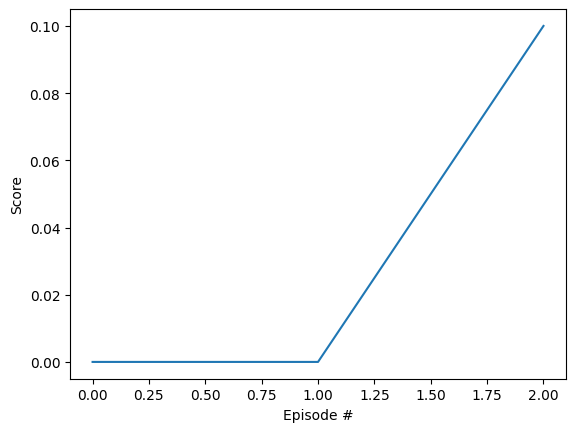

In [5]:
def ddpg(n_episodes=5000, max_t=1000):
    tic = time.time()
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):

        env_info = env.reset(train_mode=True)[brain_name] # Unity

        states = env_info.vector_observations           # Unity
        
        # assemble the scores for each agent in a temporary array.
        # at the end, we will take the max score in this collaborative game.
        _scores = np.zeros(num_agents)
        scores = list(_scores)

        for t in range(max_t):

            actions = []
            for idx, agent in enumerate(agents):
                state = states[idx]
                action = agent.act(state, noise_factor=0.001)
                actions.append(action)

            #--------------------------------------------------# Unity
            env_info = env.step(actions)[brain_name]            # send the action to the environment
            next_states = env_info.vector_observations       # get the next state
            rewards = env_info.rewards                       # get the reward
            dones = env_info.local_done                      # see if episode has finished

            # for each of the agent's observations, take a step.
            # this goes ahead and adds experience to the memory buffer and potentially trains.
            for idx, agent in enumerate(agents):
                agent.step(states[idx], actions[idx], rewards[idx], next_states[idx], dones[idx])

            states = next_states
            _scores = np.array(_scores) + np.array(rewards)

            # if any one agent is done in the environment, we are done.
            if sum(dones) > 0:
                break 

            
        scores_window.append(np.max(_scores))       # save most recent score
        scores.append(np.max(_scores))              # save most recent score
#         eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.4f}\t Memory Size: {}\tElapsed Time: {:0.4f} sec'.format(i_episode, np.mean(scores_window), len(agent.memory.memory), time.time() - tic), end="")
        if i_episode % 500 == 0:
            print('\rEpisode {}\tAverage Score: {:.4f}\t Memory Size: {}\tElapsed Time: {:0.4f} sec'.format(i_episode, np.mean(scores_window), len(agent.memory.memory), time.time() - tic))
            torch.save(agent.actor_local.state_dict(), f'checkpoint_actor_{i_episode}.pth')
            torch.save(agent.critic_local.state_dict(), f'checkpoint_critic_{i_episode}.pth')
    torch.save(agent.actor_local.state_dict(), './checkpoints/checkpoint_actor.pth')
    torch.save(agent.critic_local.state_dict(), './checkpoints/checkpoint_critic.pth')
    return scores

scores = ddpg()
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [38]:
#
# Example Training iteration.
#
# Episode 500	Average Score: 0.0682	 Memory Size: 20242 	Elapsed Time: 150.1885 sec
# Episode 1000	Average Score: 0.0159	 Memory Size: 37074 	Elapsed Time: 277.6089 sec
# Episode 1500	Average Score: 0.0828	 Memory Size: 72854 	Elapsed Time: 549.4054 sec
# Episode 2000	Average Score: 0.1120	 Memory Size: 123066	Elapsed Time: 935.6939 sec
# Episode 2500	Average Score: 0.4073	 Memory Size: 228334	Elapsed Time: 1795.4472 sec
# Episode 3000	Average Score: 0.1251	 Memory Size: 289536	Elapsed Time: 2325.0231 sec
# Episode 3500	Average Score: 1.8176	 Memory Size: 633440	Elapsed Time: 5889.3029 sec
# Episode 4000	Average Score: 1.3567	 Memory Size: 1000000	Elapsed Time: 13757.3752 sec
# Episode 4500	Average Score: 0.4269	 Memory Size: 1000000	Elapsed Time: 15602.6458 sec
# Episode 5000	Average Score: 0.7377	 Memory Size: 1000000	Elapsed Time: 19932.3672 sec

In [ ]:
#
#
# View The trained agent
#
#

# There is no need to start at the top of this notebook.  If you want to skip 
# right to training, run this cell for imports/environment definition and 
# continue on.  If the environment has already been defined above, then no 
# need to do it again here.
#
# ALERT: If you run the environment and then close it, you can not re-run 
#        the training loop without restarting the kernel or you may get 
#        a broken pipe to the Unity environment.  This occurs on Mac environments
#        and is untested on other OS's
#
try:
    # see if environment is defined from running the code above.
    # if it is, do not redefine env.
    env
except:
    from unityagents import UnityEnvironment
    import numpy as np
    import time
    import torch
    from collections import deque
    import matplotlib.pyplot as plt

    # assumes you are on a Mac
    env = UnityEnvironment(file_name="./Tennis.app")    


In [26]:
from ddpg_agent import Agent
import torch
agent0 = Agent(
    state_size=state_size, 
    action_size=action_size, 
    random_seed=0, 
    a_fc1_units=400, a_fc2_units=300,
    c_fc1_units=400, c_fc2_units=300,
)

#
# Agent with the best performance out of the checkpoints
#
agent0.actor_local.load_state_dict(torch.load('checkpoint_actor_3500.pth'))
agent0.critic_local.load_state_dict(torch.load('checkpoint_critic_3500.pth'))

#
# Example trained, but badly performing agent which reverted to bad behavior
#
# agent0.actor_local.load_state_dict(torch.load('checkpoint_actor_4500.pth'))
# agent0.critic_local.load_state_dict(torch.load('checkpoint_critic_4500.pth'))

agents = [agent0, agent0]

<All keys matched successfully>

In [27]:
env_info = env.reset(train_mode=False)[brain_name] # Unity
state = env_info.vector_observations[0]           # Unity
score = 0
max_t = 300
for t in range(max_t):

    states = env_info.vector_observations           # Unity
    _scores = np.zeros(num_agents)
    scores = list(_scores)
    actions = []
    for idx, agent in enumerate(agents):
        state = states[idx]
        action = agent.act(state, noise_factor=0.)
        actions.append(action)

    #--------------------------------------------------# Unity
    env_info = env.step(actions)[brain_name]            # send the action to the environment
    next_states = env_info.vector_observations       # get the next state
    rewards = env_info.rewards                       # get the reward
    dones = env_info.local_done                      # see if episode has finished

    # don't need to step the agent here since we are not training
    
    states = next_states
    _scores = np.array(_scores) + np.array(rewards)

    # we don't want to quit after one game, we want to see the agent play many games.
    # # if any one agent is done in the environment, we are done.
    # if sum(dones) > 0:
    #   break 

        

In [8]:
# as long as you do not close the environment, you can reload a different checkpoint above.
# and then view the agent's performance with those weights.  Closing the environment will 
# require restarting the kernel prior to being able to view the agent again.
env.close()